In [1]:
%matplotlib inline

In [1]:
# part of anaconda distribution
import pandas as pd   
from textblob import TextBlob
import nltk  # textblob uses this

# part of core Python, don't need to install
from collections import Counter  
import math

Need to install NLTK files that TextBlob uses.  Only run once:

In [21]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/christina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christina/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from nltk.corpus import stopwords

Load the data with pandas

In [2]:
ev311 = pd.read_csv("https://northwestern.box.com/shared/static/uvisy24w7necwtg17xp8umelrmazpxww.csv")

In [3]:
ev311.head()

,ID,Status,Priority,API Source,Title,Description,Date Created,Date Updated,Address,House Number,House Unit,Street Name,Street Type,Street Direction,ZIP Code,Count Comments,Count Followers,Latitude,Longitude,Address Location
0,1094447,COMPLETED,NONE,gov.publicstuff.com,Street Signs,Street signs were taken down for construction ...,08/12/2015 10:28:58 AM,08/23/2015 06:29:21 PM,Bernard & Clifford,NaN,NaN,Clifford Street,NaN,NaN,60201,3,0,42.068240,-87.729098,"(42.0682396, -87.7290981)"
1,1340563,COMPLETED,NONE,gov.publicstuff.com,Fire Prevention - Inspection of a Commercial P...,Please contact Debbie at Ext. 222,01/13/2016 03:03:18 PM,01/19/2016 04:51:26 PM,"608 Sheridan Road, Evanston, IL, United States",606-612,NaN,Sheridan Road,NaN,NaN,60202,1,0,42.028700,-87.670641,"(42.0287005, -87.6706405)"
2,1826017,COMPLETED,MEDIUM,Iframe,Water Service - Question or Concern,Last spring we called you to report that our s...,08/12/2016 02:35:12 PM,08/27/2016 07:00:27 AM,"930 Washington St, Evanston, IL 60202, USA",930,NaN,Washington St,NaN,NaN,NaN,1,0,42.032508,-87.685397,"(42.0325083, -87.6853967)"
3,1849204,COMPLETED,MEDIUM,Iframe,Trees-Fallen limb or tree,This isn't about a fallen tree or tree limb bu...,08/22/2016 09:07:45 AM,08/24/2016 07:05:32 AM,"1183-1223 Lincoln St, Evanston, IL 60201, USA",1183-1223,NaN,Lincoln St,NaN,NaN,NaN,2,0,42.062212,-87.687958,"(42.0622120152699, -87.6879576137085)"
4,1880254,COMPLETED,MEDIUM,iOS,Ask A Question / Send A Message,"Actually on back side of 621 Howard, growth in...",09/01/2016 09:03:54 AM,09/01/2016 04:52:40 PM,"1–111 Callan Ave,Evanston, IL 60202",1–111,NaN,Callan Ave,NaN,NaN,60202,3,0,42.019754,-87.679085,"(42.019754, -87.679085)"


In [5]:
ev311.shape

(64033, 20)

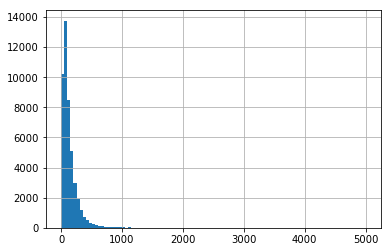

In [6]:
ev311['Description'].str.len().hist(bins=100)

In [7]:
ev311['Description'].str.len().describe()

count    46263.000000
mean       138.304628
std        163.641869
min          1.000000
25%         55.000000
50%         97.000000
75%        170.000000
max       5000.000000
Name: Description, dtype: float64

In [8]:
ev311[ev311.Description.isnull()].head(10)

,ID,Status,Priority,API Source,Title,Description,Date Created,Date Updated,Address,House Number,House Unit,Street Name,Street Type,Street Direction,ZIP Code,Count Comments,Count Followers,Latitude,Longitude,Address Location
7,1032192,COMPLETED,NONE,gov.publicstuff.com,Water Bill - New Account Request,NaN,06/08/2015 09:11:32 AM,06/08/2015 12:04:55 PM,"2308 Hastings Avenue, Evanston, IL, United States",2308,NaN,Hastings Avenue,NaN,NaN,60201,1,0,42.059205,-87.723550,"(42.059205, -87.72355)"
11,2554820,COMPLETED,NONE,gov.publicstuff.com,"Water Bill Reprint, Request an Address Change ...",NaN,04/21/2017 11:51:39 AM,04/21/2017 12:31:45 PM,"900 Oakton Street, Evanston, IL, United States",900,NaN,Oakton Street,NaN,NaN,60202,1,0,42.026393,-87.684892,"(42.0263934, -87.6848918)"
13,1258440,COMPLETED,MEDIUM,Iframe,Sidewalk- Evaluation,NaN,11/21/2015 10:28:59 AM,11/30/2015 05:49:52 PM,"2050 Ridge Ave, Evanston, IL 60201, USA",2050,NaN,Ridge Ave,NaN,NaN,NaN,3,0,42.055502,-87.687294,"(42.055502, -87.687294)"
17,1103425,COMPLETED,MEDIUM,iOS,Trees-Fallen limb or tree,NaN,08/19/2015 09:50:40 AM,08/20/2015 08:16:47 AM,"651 Dewey Ave,Evanston, IL 60202",651,NaN,Dewey Ave,NaN,NaN,60202,2,0,42.029992,-87.697025,"(42.029992, -87.697025)"
18,1107911,COMPLETED,NONE,gov.publicstuff.com,Broken Parking Meter,NaN,08/22/2015 12:37:57 PM,08/24/2015 01:54:45 PM,"1016 Church Street, Glenview, IL, United States",1014,NaN,Church Street,NaN,NaN,60025,1,0,42.073522,-87.802469,"(42.0735215, -87.8024688)"
19,1109267,COMPLETED,MEDIUM,gov.publicstuff.com,Trash - Special Pickup (STAFF ONLY),NaN,08/24/2015 10:45:01 AM,09/01/2015 08:36:27 AM,"2530 Marcy Avenue, Evanston, IL, United States",2530,NaN,Marcy Avenue,NaN,NaN,60201,3,0,42.063751,-87.719532,"(42.063751, -87.719532)"
21,1248760,COMPLETED,MEDIUM,gov.publicstuff.com,Trash - Special Pickup (STAFF ONLY),NaN,11/16/2015 01:43:22 PM,11/30/2015 02:54:13 PM,"555 Sherman Avenue, Evanston, IL, United States",555,NaN,Sherman Avenue,NaN,NaN,60202,6,0,42.028628,-87.681965,"(42.028628, -87.681965)"
27,1032012,COMPLETED,MEDIUM,iOS,Trash - Special Pickup (STAFF ONLY),NaN,06/08/2015 06:23:07 AM,06/18/2015 07:15:31 PM,"1316 Oak Ave,Evanston, IL 60201",1316,NaN,Oak Ave,NaN,NaN,60201,2,0,42.041997,-87.687208,"(42.041997, -87.687208)"
32,2523257,COMPLETED,NONE,gov.publicstuff.com,Broken Parking Meter,NaN,04/11/2017 07:00:16 PM,04/12/2017 12:49:22 PM,"1600 Sherman Avenue, Evanston, IL, United States",1600,NaN,Sherman Avenue,NaN,NaN,60201,1,0,42.047185,-87.682121,"(42.0471845, -87.682121)"
36,2526218,COMPLETED,NONE,gov.publicstuff.com,Broken Parking Meter,NaN,04/12/2017 01:36:36 PM,04/13/2017 11:49:40 AM,"1701 Sherman Avenue, Evanston, IL, United States",NaN,NaN,NaN,NaN,NaN,NaN,1,0,42.048615,-87.681367,"(42.0486147, -87.6813668)"


In [9]:
ev311['missingdesc'] = ev311.Description.isnull()
ev311.groupby(['Title', 'missingdesc']).ID.count()

Title                                                             missingdesc
(DO NOT USE) Water Bill - Final Bill for Seller                   False           131
                                                                  True            663
ADA/Inclusion Aids                                                False             4
Abandoned Bicycle on City Property                                False           189
                                                                  True             31
Abandoned Vehicle                                                 False            33
                                                                  True             12
Accessibility                                                     False            12
Advanced Disposal-Complaint (Formerly Veolia)                     False            58
                                                                  True              3
Alarm Registration                                            

In [10]:
ev311 = ev311[ev311.Description.notnull()]
ev311.shape

(46263, 21)

Now, we want to process the document to get word tokens -- actually does more than that, but it gets tokens as part of it.

In [115]:
ev311['blob'] = ev311.Description.map(TextBlob)

In [18]:
# there's probably a better way to do this...

for i in ev311.index.tolist()[:10]:  # look at first few observations
        print(ev311.Description[i], "\n", ",".join(ev311.blob[i].words))
        print("\n")

Street signs were taken down for construction and caller is inquiring as to when they will be put back up. 
 Street,signs,were,taken,down,for,construction,and,caller,is,inquiring,as,to,when,they,will,be,put,back,up


Please contact Debbie at Ext. 222 
 Please,contact,Debbie,at,Ext,222


Last spring we called you to report that our sump pump that in the past 50 years has been used to eject laundry water from the basement, was running continuously since February.  You came twice to check on it including taking a water sample and 'listening' at the street shut off valve.  You did not detect a leak.   Since then we have had three plumbers in to look at the problem.  We scoped the sewer line, one listened at the interior shut off, and we turned off the building water to see if it affected the pumping.  All negative.  The sump pump continues to run every 90 seconds 24/7, and we have one flood when the pump was accidentally turned off.  This current drought has not affected it either.   We ar

What happens to URLs?

In [19]:
for i in ev311.index[ev311.Description.str.contains("http")].tolist()[:5]:
    print(ev311.Description[i], "\n", ",".join(ev311.blob[i].words))
    print("\n")

This year we are not eligible to purchase residential parking passes for Judson Ave. This is a really big issue because parking is already bad enough for our location due to Lincoln Elementary. Visitors to the school almost always fill all spots in the vicinity and pretty much everyone in my building can never find parking within 3 blocks. Luckily last year we could purchase residential permits for Judson (just right across the street) and could sometimes find parking there in the 2hr parking. The problem is that this 2hr parking w/o permit is rarely enforced and those spots are taken by visitors as well.  So without having that option it makes things very difficult when dealing with an infant and having to carry groceries 3-4 blocks away in the cold weather. Last year we were told by the city that Lee Street was going to change to residential permit parking and that it would be zoned the same as Judson. That is why they sold us the permits last year. Is that still going to happen? It 

They are split into components.  Dates with / are kept together, as are phone numbers.

Now, get frequent words across descriptions

In [20]:
c1 = Counter()
ev311.blob.apply(lambda x: c1.update(x.word_counts))
c1.most_common(20)

[('the', 77895),
 ('is', 30784),
 ('and', 28076),
 ('to', 27280),
 ('of', 24987),
 ('caller', 22832),
 ('a', 22108),
 ('on', 20434),
 ('in', 19829),
 ('that', 19052),
 ('this', 10389),
 ('there', 10300),
 ('for', 10285),
 ('it', 10265),
 ('not', 10126),
 ('at', 9871),
 ('be', 9804),
 ('states', 9025),
 ('are', 8392),
 ('i', 8323)]

Most of these are stop words -- just common English words.  How can we exclude them?

In [27]:
sw = set(stopwords.words('english'))
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [29]:
# without removing them permanently from the counter

[x for x in c1.most_common(100) if x[0] not in sw]

[('caller', 22832),
 ('states', 9025),
 ('street', 6882),
 ('tree', 6111),
 ('alley', 5769),
 ('would', 5336),
 ('like', 4561),
 ('trash', 4330),
 ('requesting', 4057),
 ('parkway', 3788),
 ('resident', 3750),
 ('side', 3661),
 ('front', 3216),
 ('meter', 3172),
 ('reports', 3141),
 ('property', 3101),
 ('cart', 3099),
 ('please', 3068),
 ('dead', 2847),
 ('parking', 2828),
 ('city', 2764),
 ('sidewalk', 2710),
 ('water', 2607),
 ('corner', 2599),
 ('park', 2419),
 ('one', 2414),
 ('yard', 2320),
 ('block', 2128),
 ('light', 2119),
 ('south', 2108),
 ('time', 2098),
 ('2', 2090),
 ('sign', 2075),
 ('needs', 2049),
 ('large', 2007),
 ('address', 2004),
 ('recycling', 1985),
 ('evanston', 1982),
 ('also', 1906),
 ('removed', 1905),
 ('stated', 1834),
 ('north', 1830),
 ('building', 1822),
 ('area', 1806),
 ('know', 1750),
 ('need', 1744)]

Plot distribution of word counts

In [37]:
wordcounts = pd.DataFrame.from_dict(c1, orient='index').reset_index()
wordcounts.columns = ['word','n']

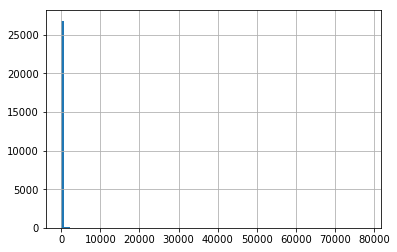

In [38]:
wordcounts.n.hist(bins=100)

This is a very severe distribution.  Zoom in:

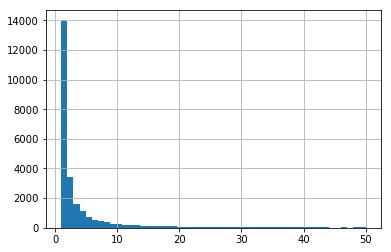

In [40]:
wordcounts[wordcounts.n <= 50].n.hist(bins=50)

There's still a significant drop-off

Count the number of documents (rows in the data) each word appears in

In [42]:
c2 = Counter()
ev311.blob.apply(lambda x: c2.update(set(x.word_counts)))
c2.most_common(20)

[('the', 29811),
 ('is', 20205),
 ('and', 18477),
 ('caller', 17240),
 ('of', 17043),
 ('to', 15910),
 ('on', 15646),
 ('in', 15009),
 ('a', 14804),
 ('that', 12965),
 ('there', 8780),
 ('not', 8522),
 ('be', 8314),
 ('at', 8185),
 ('states', 8000),
 ('for', 7950),
 ('this', 7602),
 ('it', 7162),
 ('are', 6735),
 ('has', 6409)]

In [43]:
[x for x in c2.most_common(100) if x[0] not in sw]

[('caller', 17240),
 ('states', 8000),
 ('street', 5600),
 ('would', 4836),
 ('alley', 4484),
 ('like', 4307),
 ('tree', 4155),
 ('requesting', 3920),
 ('parkway', 3380),
 ('resident', 3372),
 ('side', 3347),
 ('trash', 3265),
 ('front', 2993),
 ('please', 2873),
 ('reports', 2798),
 ('dead', 2730),
 ('meter', 2639),
 ('property', 2615),
 ('corner', 2438),
 ('sidewalk', 2298),
 ('city', 2282),
 ('parking', 2197),
 ('cart', 2073),
 ('one', 2048),
 ('water', 2031),
 ('needs', 1967),
 ('park', 1960),
 ('south', 1936),
 ('block', 1931),
 ('2', 1927),
 ('large', 1909),
 ('time', 1889),
 ('address', 1873),
 ('yard', 1838),
 ('also', 1782),
 ('north', 1727),
 ('light', 1717),
 ('removed', 1699),
 ('know', 1653),
 ('need', 1643),
 ('stated', 1623),
 ('east', 1609),
 ('sign', 1608),
 ('evanston', 1569),
 ('area', 1565),
 ('west', 1559),
 ('recycling', 1538),
 ('information', 1513)]

In [50]:
pd.DataFrame([(x[0], c1[x[0]], c2[x[0]]) for x in c1.most_common(100) if x[0] not in sw])

,0,1,2
0,caller,22832,17240
1,states,9025,8000
2,street,6882,5600
3,tree,6111,4155
4,alley,5769,4484
5,would,5336,4836
6,like,4561,4307
7,trash,4330,3265
8,requesting,4057,3920
9,parkway,3788,3380


TextBlob also gives you access to sentences if you needed, or n-grams:

In [52]:
ev311.blob[100].sentences

[Sentence("Limb down blocking Main Street in front of Robert Crown."),
 Sentence("Police Service desk was notified.")]

In [53]:
ev311.blob[100].ngrams(3)

[WordList(['Limb', 'down', 'blocking']),
 WordList(['down', 'blocking', 'Main']),
 WordList(['blocking', 'Main', 'Street']),
 WordList(['Main', 'Street', 'in']),
 WordList(['Street', 'in', 'front']),
 WordList(['in', 'front', 'of']),
 WordList(['front', 'of', 'Robert']),
 WordList(['of', 'Robert', 'Crown']),
 WordList(['Robert', 'Crown', 'Police']),
 WordList(['Crown', 'Police', 'Service']),
 WordList(['Police', 'Service', 'desk']),
 WordList(['Service', 'desk', 'was']),
 WordList(['desk', 'was', 'notified'])]

tf-idf to find important words by category (here the Title column). TextBlob doesn't have this built in.  But it's straightforward to compute:

Thanks to: https://stevenloria.com/tf-idf/

Our modification here is that we want to make one document/blob for all of the text associated with each Title -- not all of the individual responses.

And that the workflow for this is a bit convoluted (or maybe I'm just missing a more elegant solution)...

In [55]:
def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.max(0, math.log(len(bloblist) / (1 + n_containing(word, bloblist))))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [73]:
ev311groups = ev311.groupby('Title').apply(lambda x: TextBlob("\n".join(x.Description)))
ev311groups = pd.DataFrame(ev311groups, columns=["blob"])

This next cell takes a few minutes to run:

In [122]:
def word_row(x):
    print(x.Index)
    result = []
    # get words that appear more than 5 times and aren't stop words
    vocab = set([i for i in x.blob.words if x.blob.word_counts[i] > 5 and i not in sw])
    for i in vocab:
        result.append((x.Index, i, tfidf(i, x.blob, ev311groups.blob)))
    return pd.DataFrame(result, columns=['Title','word','tfidf'])

wordfreqs = pd.concat([word_row(x) for x in ev311groups.itertuples()])

(DO NOT USE) Water Bill - Final Bill for Seller
ADA/Inclusion Aids
Abandoned Bicycle on City Property
Abandoned Vehicle
Accessibility
Advanced Disposal-Complaint (Formerly Veolia)
Alarm Registration
Alleys - Maintenance
Alleys - Reconstruction
Amplified Sounds and/or Music
Animal Issue/Concern - General
Animal Service - Wilmette
Animals - Too Many, Offensive, Odors, Unsanitary Messes
Ask A Question / Send A Message
Bathroom Maintenance/City Parks
Bats
Bee/Wasp Infestation
Bike Plan/Submit Your Input
Bike Racks
Bike Routes/Bike Lanes Road Maintenance
Birds
Broken Buffalo Box
Broken Fence or Bench
Broken Park/Playground Equipment
Broken Parking Meter
Broken Pay Station
Building Permit Inspection Request
Check my Wheel Tax Payment Status?
Child Seat Installation or Inspection
Christmas Tree Pick-Up
Collection Boxes
Construction/Engineering
Contaminated Sites
DO NOT USE Trash - Small Electronic Appliance Pick-up
Dead Animal on Public Property
Dead Rodent-Rat
Dropped Keys/item in Drainage S

In [124]:
wordfreqs.head()

,Title,word,tfidf
0,(DO NOT USE) Water Bill - Final Bill for Seller,address,0.005958
1,(DO NOT USE) Water Bill - Final Bill for Seller,property,0.005887
2,(DO NOT USE) Water Bill - Final Bill for Seller,closing,0.029096
3,(DO NOT USE) Water Bill - Final Bill for Seller,new,0.003432
4,(DO NOT USE) Water Bill - Final Bill for Seller,reading,0.011981


Let's look at top words for most frequent categories

In [97]:
freqcats = ev311.groupby('Title').Title.count().sort_values()[-6:]
freqcats

Title
Trash - Special Pickup (STAFF ONLY)    1521
Dead Animal on Public Property         1762
Rodents- Rats                          2050
Tree Evaluation                        3089
Broken Parking Meter                   3973
Ask A Question / Send A Message        5190
Name: Title, dtype: int64

In [129]:
(wordfreqs[wordfreqs.Title.isin(freqcats.index)]  # select frequent categories
        .sort_values(['Title', 'tfidf'], ascending=False)  # sort all of the data by category and score
        .groupby(['Title']) # apply actual grouping to the data
 .head(10)  # get top 10 words for each group
)

,Title,word,tfidf
549,Tree Evaluation,tree,0.037317
59,Tree Evaluation,trimmed,0.020050
50,Tree Evaluation,branches,0.018824
656,Tree Evaluation,trees,0.016288
214,Tree Evaluation,parkway,0.015055
104,Tree Evaluation,trimming,0.009654
212,Tree Evaluation,dead,0.009494
406,Tree Evaluation,caller,0.008270
589,Tree Evaluation,limbs,0.007688
310,Tree Evaluation,elm,0.007603


There are other ways to do this -- possibly better ones if you have a lot of text or documents.  sklearn has tfidf implementation: 

* https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
* https://medium.freecodecamp.org/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3 
* https://www2.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html
* http://kavita-ganesan.com/extracting-keywords-from-text-tfidf